In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("EDA_Aircraft1.csv", encoding='latin-1')
df.head()

,Date,Year,Month,Time,Location,Latitude CRASH PLACE,Longitude CRASH PLACE,Operator,Flight #,Route,...,Destination,Latitude Destination,Longitude Destination,AC Type,Registration,cn/ln,Aboard,Fatalities,Fatality_Ratio (%),Summary
0,1928-01-16,1928,1,0,"Solis, Uruguay",NaN,NaN,Aeropostale,F-AIKG,Buenos Aires - Montevideo,...,Montevideo,NaN,NaN,Latecoere 25,F-Aikg,633,2.0,2.0,100.000000,The wing on the mail plane detached from the a...
1,1930-01-19,1930,1,18:23,"Oceanside, California",NaN,NaN,Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",...,Los Angeles,NaN,NaN,Ford 5-At-C Tri Motor,Nc9689,5-AT-046,16.0,16.0,100.000000,"While en route to Los Angeles, the pilot, flyi..."
2,1931-03-31,1931,3,10:45,"Bazaar, Kansas",NaN,NaN,Trans Continental And Western Air,599,Kansas City - Wichita - Los Angeles,...,Wichita - Los Angeles,NaN,NaN,Fokker F10A Trimotor,Nc-999,1063,8.0,8.0,100.000000,"Shortly after taking off from Kansas City, one..."
3,1934-08-31,1934,8,22:45,"Amazonia, Missouri",NaN,NaN,Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,...,Saint Joseph - Omaha,NaN,NaN,Stinson Sm-6000B,Nc11118,5004,5.0,5.0,100.000000,The plane crashed about 11 miles from St. Jose...
4,1935-05-06,1935,5,3:30,"Atlanta, Missouri",NaN,NaN,Trans Continental And Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,...,Albuquerque - Kanasas City - Washington,NaN,NaN,Douglas Dc-2-112,Nc13785,1295,14.0,5.0,35.714286,The plane crashed while en route from Albuquer...


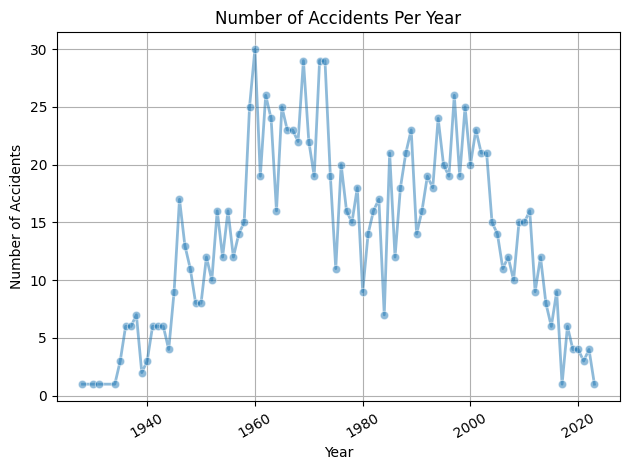

In [25]:
# Grouping data by year
accidents_per_year = df.groupby('Year').size().reset_index(name='Accident_Count')

# Plotting with Seaborn
sns.lineplot(data=accidents_per_year, x='Year', y='Accident_Count', marker='o', alpha=0.5, linewidth=2)

# Customizing the plot
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

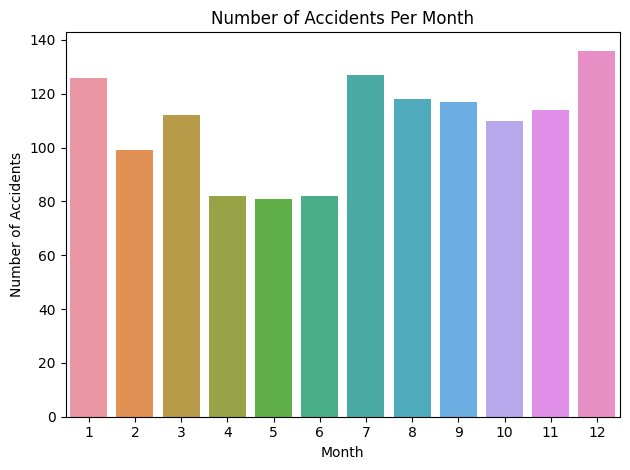

In [26]:
# Plotting with Seaborn
accidents_per_month = df.groupby('Month').size().reset_index(name='Accident_Count')
sns.barplot(data=accidents_per_month, x='Month', y='Accident_Count')

# Customizing the plot
plt.title('Number of Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

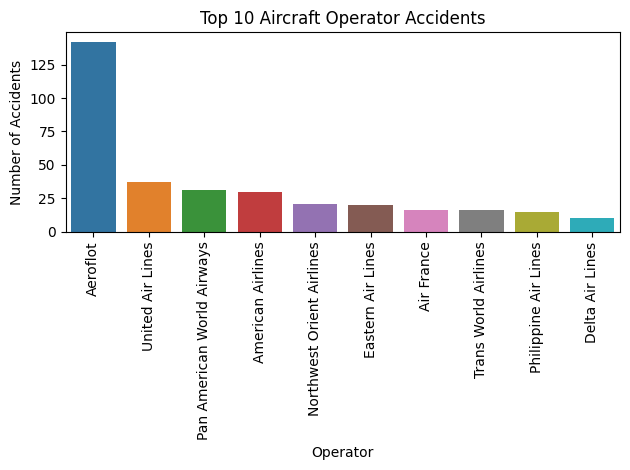

In [56]:

# Grouping accidents per operator
accidents_per_operator = df.groupby('Operator').size()

# Filter operators with more than 3 crashes and select top 10
accidents_per_operator = accidents_per_operator[accidents_per_operator > 3].nlargest(10)

# Plotting with Seaborn
plt.figure()
sns.barplot(x=accidents_per_operator.index, y=accidents_per_operator.values)
plt.title('Top 10 Aircraft Operator Accidents')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

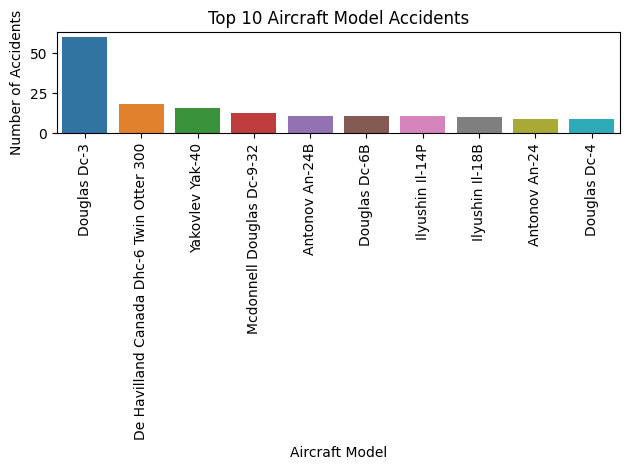

In [55]:
# Grouping accidents per model
accidents_per_model = df.groupby('AC Type').size()

# Filter operators with more than 3 crashes and select top 10
accidents_per_model = accidents_per_model[accidents_per_model > 3].nlargest(10)

# Plotting with Seaborn
plt.figure()
sns.barplot(x=accidents_per_model.index, y=accidents_per_model.values)
plt.title('Top 10 Aircraft Model Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

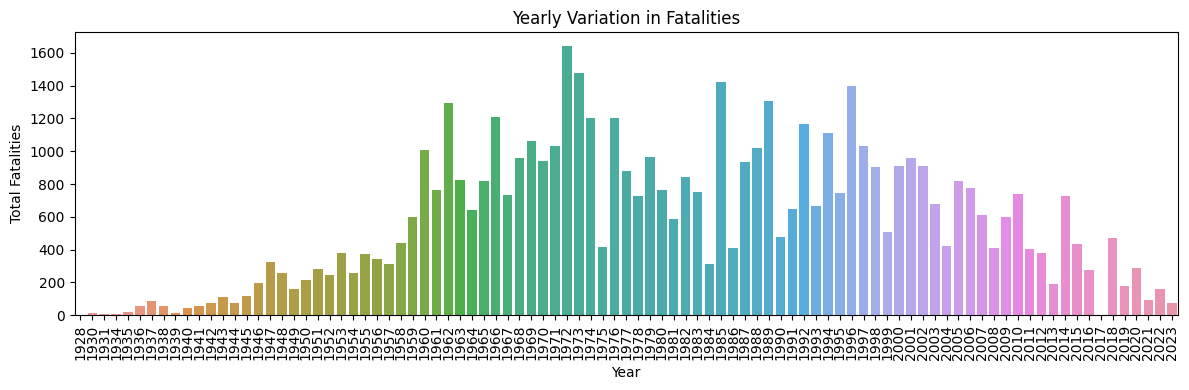

In [54]:
# Grouping data by year and summing up the fatalities
yearly_fatalities = df.groupby('Year')['Fatalities'].sum()

# Plotting with Seaborn
plt.figure(figsize=(12,4))
sns.barplot(x=yearly_fatalities.index, y=yearly_fatalities.values)
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.title('Yearly Variation in Fatalities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

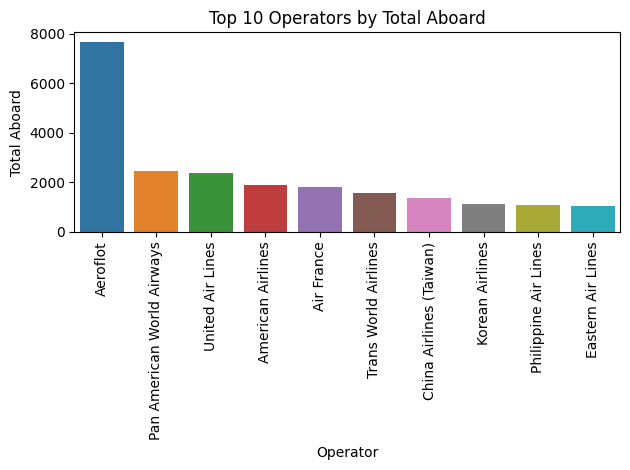

In [57]:
# Calculate the total number of people aboard for each operator
operator_aboard_counts = df.groupby('Operator')['Aboard'].sum().nlargest(10)

# Creating a bar plot of top 10 operators vs. total people aboard
plt.figure()
sns.barplot(x=operator_aboard_counts.index, y=operator_aboard_counts.values)
plt.title('Top 10 Operators by Total Aboard')
plt.xlabel('Operator')
plt.ylabel('Total Aboard')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

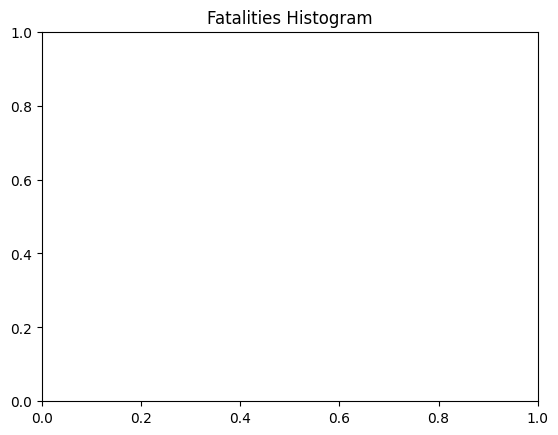

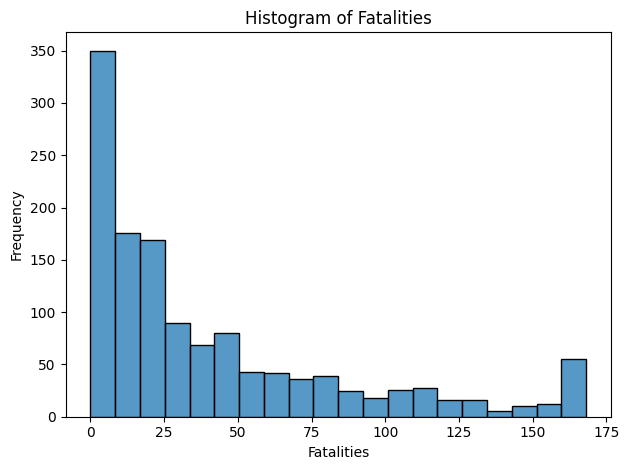

In [32]:
plt.title("Fatalities Histogram")

# Histogram Plot
fig, ax = plt.subplots()
ax = sns.histplot(df['Fatalities'], bins=20, ax=ax)
plt.title('Histogram of Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.xticks()
plt.tight_layout()

# Show the plot
plt.show(fig)

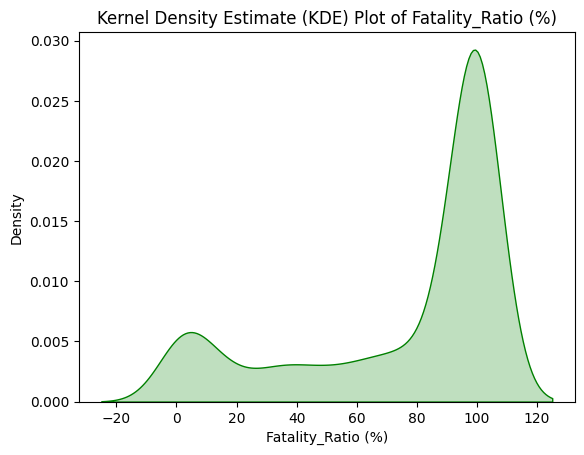

In [33]:
#KDE plot of fatality ratio
plt.figure()
sns.kdeplot(df['Fatality_Ratio (%)'], fill=True, color='green')
plt.title('Kernel Density Estimate (KDE) Plot of Fatality_Ratio (%)')
plt.xlabel('Fatality_Ratio (%)')
plt.show()

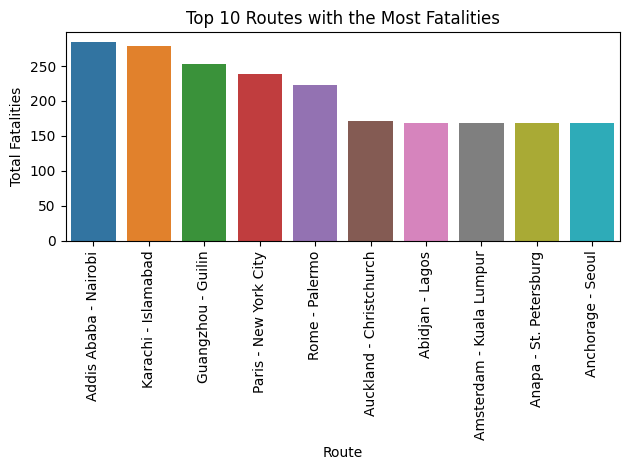

In [34]:
# Group the data by route and sum up the fatalities
fatalities_by_route = df.groupby('Route')['Fatalities'].sum()

# Filter operators with more than 3 crashes and select top 10
fatalities_by_route = fatalities_by_route[fatalities_by_route > 3].nlargest(10)

# Plotting with Seaborn
plt.figure()
sns.barplot(x=fatalities_by_route.index, y=fatalities_by_route.values)
plt.xlabel('Route')
plt.ylabel('Total Fatalities')
plt.title('Top 10 Routes with the Most Fatalities')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

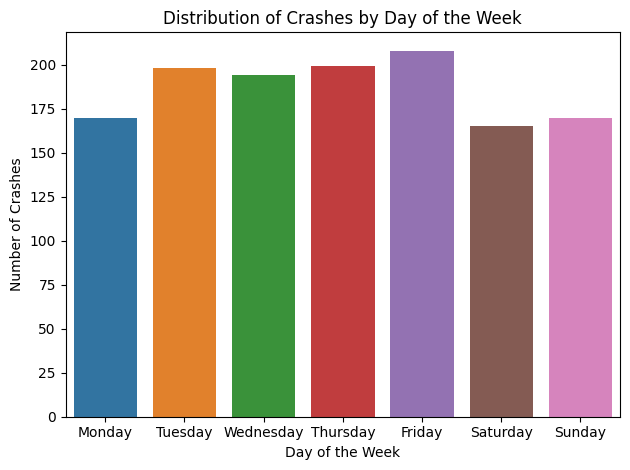

In [35]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the week from the date
df['Day_of_Week'] = df['Date'].dt.day_name()

# Count the number of crashes by day of the week
crashes_by_day = df['Day_of_Week'].value_counts()

# Order the days of the week starting from Monday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure()
sns.barplot(x=crashes_by_day.index, y=crashes_by_day.values, order=order)

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Distribution of Crashes by Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()

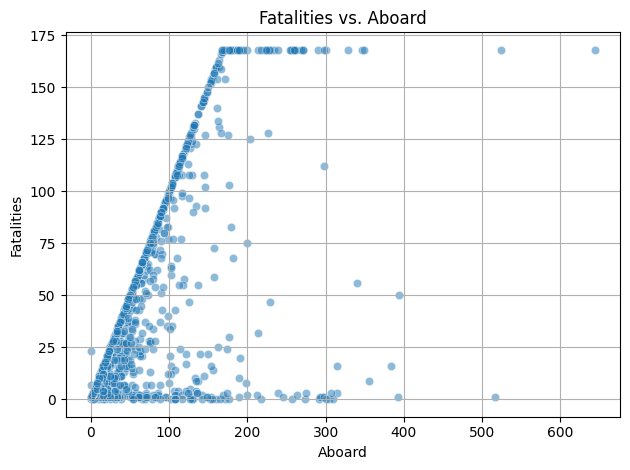

In [36]:
plt.figure()
sns.scatterplot(data=df, x='Aboard', y='Fatalities', alpha=0.5)

plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.title('Fatalities vs. Aboard')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

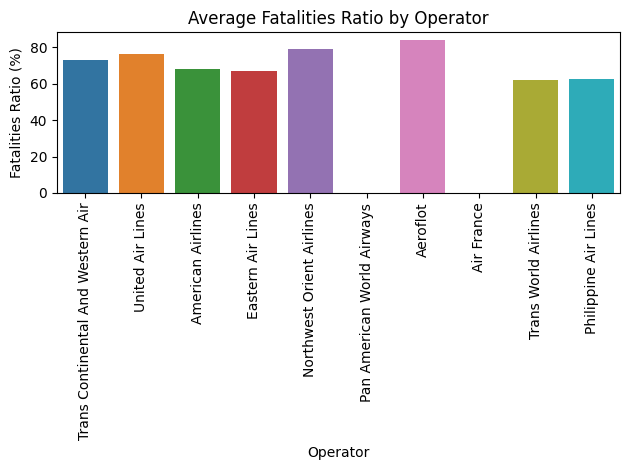

In [37]:
# Calculate fatalities ratio
df['Fatalities_Ratio'] = (df['Fatalities'] / df['Aboard']) * 100

# Select top 10 operators with the most crashes
top_operators = df['Operator'].value_counts().index[:10]

plt.figure()
sns.barplot(data=df[df['Operator'].isin(top_operators)], x='Operator', y='Fatalities_Ratio', errorbar=None)
plt.title('Average Fatalities Ratio by Operator')
plt.xlabel('Operator')
plt.ylabel('Fatalities Ratio (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()